In [0]:
!pip install -U -q PyDrive

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
id = '1ss7mfx-RQEYXD5_cBltHxnto_FCwe8UG'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('Dataset.zip')

In [36]:
!ls

adc.json  Dataset.zip		__MACOSX     sign_language_vgg16_1.h5
Dataset   hand_sign_digit_data	sample_data


In [5]:
!unzip Dataset.zip

Archive:  Dataset.zip
   creating: Dataset/
   creating: Dataset/9/
  inflating: Dataset/9/IMG_5805.JPG  
   creating: __MACOSX/
   creating: __MACOSX/Dataset/
   creating: __MACOSX/Dataset/9/
  inflating: __MACOSX/Dataset/9/._IMG_5805.JPG  
  inflating: Dataset/9/IMG_4925.JPG  
  inflating: __MACOSX/Dataset/9/._IMG_4925.JPG  
  inflating: Dataset/9/IMG_4058.JPG  
  inflating: __MACOSX/Dataset/9/._IMG_4058.JPG  
  inflating: Dataset/9/IMG_4845.JPG  
  inflating: __MACOSX/Dataset/9/._IMG_4845.JPG  
  inflating: Dataset/9/IMG_4138.JPG  
  inflating: __MACOSX/Dataset/9/._IMG_4138.JPG  
  inflating: Dataset/9/IMG_5959.JPG  
  inflating: __MACOSX/Dataset/9/._IMG_5959.JPG  
  inflating: Dataset/9/IMG_5795.JPG  
  inflating: __MACOSX/Dataset/9/._IMG_5795.JPG  
  inflating: Dataset/9/IMG_4475.JPG  
  inflating: __MACOSX/Dataset/9/._IMG_4475.JPG  
  inflating: Dataset/9/IMG_5233.JPG  
  inflating: __MACOSX/Dataset/9/._IMG_5233.JPG  
  inflating: Dataset/9/IMG_5421.JPG  
  inflating: __MACOSX/Da

In [38]:
#画像のrename
import os, shutil

original_dataset_dir = 'Dataset'
folder_name = ["0","1","2","3","4","5","6","7","8","9"]

for j in range(0, len(folder_name)):
    print (folder_name[j])

    files = os.listdir(original_dataset_dir + "/" + folder_name[j] + "/")

    for i in range(0, len(files)):
        print (files[i])
        root, extension = os.path.splitext(files[i])
        if files[i] == ".DS_Store":
            print("This is no image.")
        elif extension == ".png" or ".jpeg" or ".jpg":
            shutil.move(original_dataset_dir + "/" + folder_name[j] + "/" + files[i], original_dataset_dir + "/" + folder_name[j] + "/" + folder_name[j] + "_" + str(i + 1) + ".jpg")

print("Rename Done.")

0
0_17.jpg
0_36.jpg
0_31.jpg
0_29.jpg
0_27.jpg
0_65.jpg
0_4.jpg
0_23.jpg
0_98.jpg
0_87.jpg
0_12.jpg
0_60.jpg
0_25.jpg
0_7.jpg
0_72.jpg
0_77.jpg
0_85.jpg
0_56.jpg
0_76.jpg
0_97.jpg
0_32.jpg
0_13.jpg
0_18.jpg
0_9.jpg
0_94.jpg
0_58.jpg
0_21.jpg
0_35.jpg
0_34.jpg
0_11.jpg
0_67.jpg
0_59.jpg
0_95.jpg
0_71.jpg
0_43.jpg
0_3.jpg
0_5.jpg
0_42.jpg
0_101.jpg
0_8.jpg
0_89.jpg
0_15.jpg
0_80.jpg
0_20.jpg
0_22.jpg
0_62.jpg
0_41.jpg
0_86.jpg
0_84.jpg
0_57.jpg
0_53.jpg
0_81.jpg
0_79.jpg
0_37.jpg
0_63.jpg
0_69.jpg
0_100.jpg
0_10.jpg
0_2.jpg
0_6.jpg
0_33.jpg
0_92.jpg
0_55.jpg
0_64.jpg
0_88.jpg
0_46.jpg
0_24.jpg
0_14.jpg
0_99.jpg
0_52.jpg
0_74.jpg
0_93.jpg
0_28.jpg
0_68.jpg
0_49.jpg
0_90.jpg
0_75.jpg
0_1.jpg
0_83.jpg
0_50.jpg
0_30.jpg
0_44.jpg
0_38.jpg
0_61.jpg
0_26.jpg
0_70.jpg
0_40.jpg
0_45.jpg
0_47.jpg
0_73.jpg
0_16.jpg
0_91.jpg
0_82.jpg
0_96.jpg
0_51.jpg
0_54.jpg
0_66.jpg
0_48.jpg
0_78.jpg
0_39.jpg
0_19.jpg
1
1_83.jpg
1_99.jpg
1_60.jpg
1_67.jpg
1_55.jpg
1_71.jpg
1_15.jpg
1_96.jpg
1_4.jpg
1_37.jpg
1_20.

In [18]:
#train, val, test　への振り分け
import os, shutil

original_dataset_dir = 'Dataset'
base_dir = 'hand_sign_digit_data'
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

folder_name = ["0","1","2","3","4","5","6","7","8","9"]

for j in range(0, len(folder_name)):
    os.mkdir(os.path.join(train_dir, folder_name[j]))
    os.mkdir(os.path.join(validation_dir, folder_name[j]))
    os.mkdir(os.path.join(test_dir, folder_name[j]))

    fnames = [folder_name[j] + '_{}.jpg'.format(i) for i in range(1,101)]
    for fname in fnames:
        src = os.path.join(original_dataset_dir, folder_name[j], fname)
        dst = os.path.join(train_dir, folder_name[j], fname)
        shutil.copyfile(src, dst)

    fnames = [folder_name[j] +'_{}.jpg'.format(i) for i in range(101, 151)]
    for fname in fnames:
        src = os.path.join(original_dataset_dir, folder_name[j], fname)
        dst = os.path.join(validation_dir, folder_name[j], fname)
        shutil.copyfile(src, dst)

    fnames = [folder_name[j] +'_{}.jpg'.format(i) for i in range(151, 201)]
    for fname in fnames:
        src = os.path.join(original_dataset_dir, folder_name[j], fname)
        dst = os.path.join(test_dir, folder_name[j], fname)
        shutil.copyfile(src, dst)

print("Data generate Done.")

FileExistsError: ignored

In [7]:
!pip3 install tensorflow==2.1.0
!pip3 install keras
!pip3 install tensorflowjs

     |████████████████████████████████| 421.8MB 39kB/s 
     |████████████████████████████████| 450kB 57.9MB/s 
     |████████████████████████████████| 3.8MB 58.6MB/s 
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0
     |████████████████████████████████| 61kB 9.5MB/s 
     |████████████████████████████████| 104.6MB 99kB/s 
     |████████████████████████████████| 256kB 56.4MB/s 
     |████████████████████████████████| 901kB 61.9MB/s 
  Created wheel for PyInquirer: filename=PyInquirer-1.0.3-cp36-none-any.whl size=32851 sha256=a347c2d4e73b38220e170ae6f474cb15744d8da0852faa0189ee6a556aab333d
  Stored in dire

In [45]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import tensorflowjs as tfjs



model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(100, 100, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

classes = ['zero', 'one', 'two', 'three', 'four',
           'five', 'seven', 'eight', 'nine']

train_dir = 'hand_sign_digit_data/train'
validation_dir = 'hand_sign_digit_data/validation'

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(100, 100),
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(100, 100),
        batch_size=32,
        class_mode='categorical')

history = model.fit_generator(
      train_generator,
      #元のコードは,50であったがよく言われる [step_per_epoch = train_sample_num / batch_size]を考えるとなんか変
      #今回の場合以下のように steps_per_epoch　と　validation_steps　を変更で解決
      #時間があったらgenerater作ってもいいかも
      steps_per_epoch=31,
      #epoch数についても100ぐらい回したら安定した感がある
      epochs=100,
      validation_data=validation_generator,
      validation_steps=15)

model.save('sign_language_vgg16_1.h5')


Found 1000 images belonging to 10 classes.
Found 500 images belonging to 10 classes.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 31 steps, validate for 15 steps
Epoch 1/100
31/31 [==============================] - 22s 706ms/step - loss: 2.3083 - acc: 0.0940 - val_loss: 2.3023 - val_acc: 0.1000
Epoch 2/100
31/31 [==============================] - 21s 683ms/step - loss: 2.3034 - acc: 0.0817 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 3/100
31/31 [==============================] - 21s 665ms/step - loss: 2.3029 - acc: 0.0888 - val_loss: 2.3025 - val_acc: 0.1021
Epoch 4/100
31/31 [==============================] - 21s 662ms/step - loss: 2.3029 - acc: 0.0878 - val_loss: 2.3022 - val_acc: 0.1104
Epoch 5/100
31/31 [==============================] - 20s 654ms/step - loss: 2.3026 - acc: 0.0857 - val_loss: 2.3012 - val_acc: 0.1813
Epoch 6/100
31/31 [==============================] - 20s 650ms/step - loss: 2.3019 - acc: 0.1322 - val_loss: 2.2802 - val_acc: 0.1542
Epoch 7/100
31/31 [

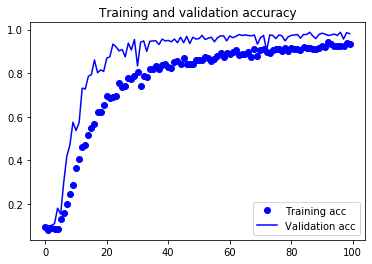

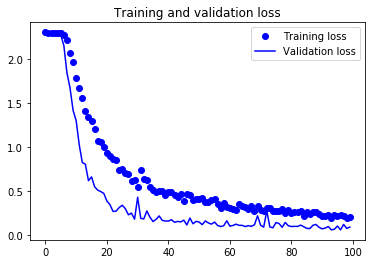

In [46]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [47]:
#convert the vgg16 model into tf.js model
save_path = 'sign_language_vgg16'
tfjs.converters.save_keras_model(model, save_path)
print("[INFO] saved tf.js vgg16 model to disk..")


[INFO] saved tf.js vgg16 model to disk..


In [48]:
!zip -r sign_language_vgg16.zip sign_language_vgg16

  adding: sign_language_vgg16/ (stored 0%)
  adding: sign_language_vgg16/group1-shard2of2.bin (deflated 7%)
  adding: sign_language_vgg16/model.json (deflated 84%)
  adding: sign_language_vgg16/group1-shard1of2.bin (deflated 7%)


In [51]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

classes = ['zero', 'one', 'two', 'three', 'four','five', 'six', 'seven', 'eight', 'nine']

# path to test image
img_path = "hand_sign_digit_data/test/2/2_151.jpg"
img = image.load_img(img_path, target_size=(100, 100))
img_array = image.img_to_array(img)
pImg = np.expand_dims(img_array, axis=0)/255

model_path = "sign_language_vgg16_1.h5"

sign_language_vgg16 = load_model(model_path)

prediction = sign_language_vgg16.predict(pImg)[0]

print(prediction)
print(np.argmax(prediction))

top_indices = prediction.argsort()[-5:][::-1]
result = [(classes[i] , prediction[i]) for i in top_indices]
for x in result:
    print(x)

[6.0306489e-11 6.3458021e-05 9.9993563e-01 7.2973194e-08 1.8355554e-13
 1.2839313e-25 6.9655590e-07 7.7798774e-08 2.3553709e-10 3.8643133e-08]
2
('two', 0.9999356)
('one', 6.345802e-05)
('six', 6.965559e-07)
('seven', 7.7798774e-08)
('three', 7.2973194e-08)
